# PROYECTO WAZE CHURN - INFORME ESCRITO

- #### Juan Pablo Colomé
- #### Carlos Moreno

---
## 1. Introducción
 + El proyecto es sobre llevar modelos a ambientes productivos a través de el ciclo de vida de MLOPs. En este caso serán modelos que tratan de predecir el churn de los usuarios en WAZE. A través de este proyecto, se busca identificar patrones clave que permitan mejorar la experiencia del usuario y predecir el comportamiento de abandono. El presente proyecto aborda el desarrollo de una solución de ciencia de datos para predecir. Utilizando un enfoque sistemático basado en MLOps, se integraron técnicas de análisis de datos, entrenamiento de modelos, creación de APIs y contenedores para desplegar una aplicación funcional. Se hace uso de repositorios en github para llevar control de proyectos y se usa dagshub también.


## 2. Antecedentes
- El análisis de datos en el contexto de aplicaciones móviles es crucial para comprender cómo los usuarios interactúan con la plataforma, qué motiva su comportamiento y cómo mejorar su retención. Waze, como aplicación de navegación, presenta un caso interesante, ya que sus usuarios pueden depender de ella para múltiples funciones, desde la navegación diaria hasta la planificación de rutas a largo plazo. El dataset que se usa fue sacado de el siguiente link, https://www.kaggle.com/datasets/monaelshamaa/waze-dataset-6/data. El dataset lleva 4 meses desde que se publico en el momento que se creo este proyecto, por lo que no tiene muchos antecedentes. De hecho, solo la autora del dataset ha subido notebooks donde trabaja con este dataset.

## 3. Objetivos

- ### Objetivo Generales
    + Desarrollar un sistema de predicción de churn para usuarios de Waze mediante técnicas de ciencia de datos y MLOps.

- ### Objetivos Específicos:
    + Realizar un análisis exploratorio de los datos (EDA) para identificar patrones y características relevantes.
    + Preprocesar los datos mediante técnicas de limpieza y transformación.
    + Entrenar y evaluar modelos de predicción utilizando MLflow y Prefect para el tracking de experimentos.
    + Seleccionar el mejor modelo basado en métricas de rendimiento.
    + Crear una API para servir el modelo seleccionado y realizar predicciones en tiempo real.
    + Diseñar una interfaz gráfica (frontend) para facilitar el acceso a las predicciones.
    + Contenerizar y desplegar el servicio en un entorno replicable usando Docker.

## 4. Planteamiento del problema
+ El problema que se busca abordar en este proyecto es la retención de usuarios de la aplicación Waze. Identificar qué factores contribuyen al abandono y qué características están asociadas con la retención puede ayudar a diseñar estrategias más efectivas para mantener a los usuarios.

+ Este proyecto busca resolver este problema mediante la creación de un sistema de predicción de churn basado en datos históricos de uso de la plataforma, utilizando técnicas avanzadas de ciencia de datos y MLOps.


---
## 5. DESARROLLO
- A continuación se explica el desarrollo del proyecto.

- ### 5.0. ARQUITECTURA
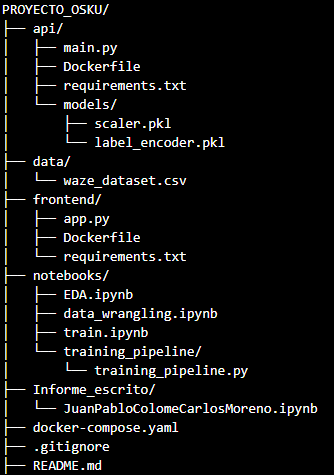

- ### 5.1. EDA
    + EDA (Análisis Exploratorio de Datos): Para lograr este paso hicimos un notebook que se llama EDA.ipynb, el cual se encuentra dentro de la carpeta notebooks. En este se buscan características y patrones importantes de los datos a través de gráficas para lograr un mejor entendimiento del problema. También se busca por datos nulos para poder tratarlos.

- ### 5.2. DATA WRANGLING 
    + Data Wrangling: Para este hicimos otro notebook llamado data_wrangling.ipynb, el cual también esta dentro de la carpeta notebooks. Este notebook fue usado para probar diferentes modelos haciendo también selección de columnas.

- ### 5.3. TRACKING DE MODELOS CON MLFLOW
    + Entrenamiento del modelo con MLflow: Este es un notebook llamado train.ipynb dentro de la carpeta notebooks. En este se hace tracking de modelos en mlflow. Para este punto se esta usando un repo en dagshub, de ahí usamos la UI de MlFlow para crear experimentos, en los cuales loguemos modelos, métricas, parámetros y artefactos. Se entrenan distintos modelos y cada uno se le hace hyperparameter tuning usando randomizer search. Luego se asignan alias de Champion y Challenger a los dos mejores modelos, a los cuales también se les hace model registry.

- ### 5.4. SELECCIÓN DE MEJOR MODELO
    + Selección del mejor modelo: Para lograr esto usamos un MlFlow Client, el cual te permite ver runs de un experimento. De esta manera logramos ordenar de manera descendiente cada modelo por la métrica accuracy, la cual fue logueada en todos los modelos y así logramos obtener el mejor modelo según su accuracy, al cual se le asigna el alias Champion. Esta implementación fue usada tanto en el tracking de modelos de mlflow (train.ipynb), como en el flujo de prefect (training_pipeline.py).

- ### 5.5. ORQUESTACIÓN DE PREFECT
    + Orquestación - Training Pipeline: Para lograr esto hicimos un archivo de python llamado training_pipeline.py, el cual esta dentro de la carpeta que se llama training_pipeline, la cual esta dentro de la carpeta llamada notebooks. Este archivo hace básicamente lo mismo que el archivo de tracking de modelos con MlFlow (train.py), pero lo lleva a un flujo de prefect. Se asignan tasks para cada paso, como tasks para cargar los datos, preprocesarlos, entrenar modelos, tunearlos, asignar alias, registrar modelos, etc... Después se ejecutan las tasks dentro de un flow para organizar el orden de las tasks y poder lograr el tracking de modelos. Este archivo es muy importante, ya que los modelos que se registran usando prefect, son los que usamos para las predicciones en la api.

- ### 5.6. API/BACKEND
    + Servir el modelo (API) con el mejor desempeño: Para esto, se creo una carpeta que se llama api y todo lo que esta dentro de esta forma el backend de la app. Dentro de la carpeta hay una carpeta models la cual tiene los modelos del label_encoder y el StandardScaler ya entrenado y tres archivos: main.py, dockerfile, requirements.txt. 

    + En el main.py se crea la api usando Fastapi. También carga el modelo Champion de mlflow de los modelos de prefect, carga el label encoder y carga el scaler. Define el esquema de entrada para pasar distintos datos usando solo las columnas con las que se entrenaron los modelos: "sessions", "drives", "total_sessions". Luego hace un endpoint predict en el cual a los datos nuevos del esquema, los transforma usando el scaler, los predice usando el modelo y luego invierte la transformación con el label encoder y así se logra la predicción en la api.

    + El dockerfile lo que hace es que da las instrucciones para la creación de la imagen de la api. Usa el archivo de requirements.txt, el cual tiene las dependencias necesarias de la api, y el dockerfile las ejecuta cuando la imagen es creada. Todo esto se ejecuta localmente en postman para probar que funcione antes de la creación de contenedores.

- ### 5.7. FRONTEND
    + Interfaz Gráfica: Para esto, se creo una carpeta que se llama frontend y todo lo que esta dentro de esta forma el frontend de la app. Dentro de la carpeta hay tres archivos: app.py, dockerfile y requirements.txt

    + En el app.py se crea la interfaz de streamlit, se configura el título los botones, los inputs y las predicciones. Envía una solicitud a la api para obtener la predicción según los inputs, y maneja la respuesta de la api.

    +  El dockerfile lo que hace es que da las instrucciones para la creación de la imagen de la api. Usa el archivo de requirements.txt, el cual tiene las dependencias necesarias de la api, y el dockerfile las ejecuta cuando la imagen es creada. Todo esto se ejecuta localmente en postman para probar que funcione antes de la creación de contenedores.

- ### 5.8. CREACIÓN DE CONTENEDORES
    + Conteneirizar del servicio: Para esta parte se hace uso de contenedores en Docker. Para lograr esto, se creo el archivo docker-compose.yaml, el cual crea los contenedores de las imágenes para la api y el frontend. De esta manera podemos hacer que las predicciones y la aplicación funcionen juntas y así lleguemos a nuestro objetivo.

- ### 5.9. DESPLIEGUE DEL SERVICIO
Despliegue del servicio en la nube: Se hace uso del comando docker compose up para desplegar los contenedores en la nube y asi poder acceder a la app de streamlit y hacer predicciones desde ahí. Desde ahí se pueden configurar los datos que quieras usar para hacer predicciones de una manera sencilla y eficaz, así logrando el objetivo del proyecto.

---
## 6. Conclusión

El desarrollo de este proyecto permitió predecir el churn de usuarios de Waze, combinando ciencia de datos y prácticas de MLOps.

1. **Aprendizajes técnicos y prácticos:**
   - Se adquirió experiencia práctica en la implementación de técnicas avanzadas de ciencia de datos, desde la limpieza de datos hasta el entrenamiento y la evaluación de modelos.

2. **Retos enfrentados:**
   - Uno de los mayores desafíos fue poder cargar el modelo Champion de MlFlow, aunque puede sonar algo sencillo, fue una parte donde tuvimos mucho error.
   - También se identificaron dificultades al crear la api, ya que a la hora de hacer requests no lo lograbamos.

En conclusión, el proyecto demostró ser un éxito al construir un pipeline sólido y reproducible que abarca desde el análisis de datos hasta el despliegue del modelo. Este sistema marca un paso significativo personal hacia el uso de herramientas avanzadas para resolver problemas de negocio reales.
